In [1]:
import os
import openai
import pandas as pd
import time

# OpenAI API 키 설정
openai.api_key = 

# 데이터 폴더 경로
data_folder_path = "./한강수_combined_reviews.csv"

# 폴더 내 모든 CSV 파일 가져오기
file_list = [f for f in os.listdir(data_folder_path) if f.endswith('.csv')]

# 파일마다 감성 분석 수행
for file_name in file_list:
    review_file_path = os.path.join(data_folder_path, file_name)
    reviews_df = pd.read_csv(review_file_path)

    # 감성 분석 결과를 저장할 리스트
    sentiments = []

    # 리뷰마다 감성 분석 수행
    for review_text in reviews_df['Review']:  # 컬럼명이 'Review'라고 가정
        try:
            # 최신 ChatCompletion 모델을 사용한 감성 분석
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo-1106",
                messages=[
                    {"role": "system", "content": "당신은 감성 분석을 전문으로 하는 도움말 어시스턴트입니다. 문맥이 없는 단어(예: '좋아요', '별로예요')만 있는 경우, 단어의 감성에 따라 '긍정적' 또는 '부정적'으로 응답하세요."},
                    {"role": "user", "content": f"다음 리뷰의 감성을 분석하여 '긍정적' 또는 '부정적' 형식으로만 응답해 주세요: '{review_text}'"}
                ],
                max_tokens=20,  # 응답 길이를 줄입니다.
                temperature=0.2
            )
            
            # API 응답에서 감성 분석 결과 추출
            response_text = response.choices[0].message['content'].strip()
            if "긍정적" in response_text:
                sentiment = "긍정적"
            elif "부정적" in response_text:
                sentiment = "부정적"
            else:
                sentiment = "알 수 없음"
            
            sentiments.append(sentiment)
            
        except Exception as e:
            print(f"리뷰 처리 중 오류 발생: {e}")
            sentiments.append("오류")
            time.sleep(1)  # 오류 발생 시 잠시 대기
        
        # 요청 빈도 제어
        time.sleep(0.5)  # 각 요청 사이에 대기 시간 추가

    # 결과를 데이터프레임에 추가
    reviews_df['sentiment'] = sentiments

    # 원본 파일 이름에 "_분석" 추가하여 저장
    #base_name = os.path.splitext(file_name)[0]
    #output_path = f"./data/{base_name}_분석.csv"
    #reviews_df.to_csv(output_path, index=False)
    print("감성 분석 완료")

NotADirectoryError: [WinError 267] 디렉터리 이름이 올바르지 않습니다: './한강수_combined_reviews.csv'

In [2]:
import os
import openai
import pandas as pd
import time

# OpenAI API 키 설정
openai.api_key = 

# 분석할 파일 경로를 직접 지정
review_file_path = "./한강수_combined_reviews.csv"

# CSV 파일 읽기
reviews_df = pd.read_csv(review_file_path)

# 감성 분석 결과를 저장할 리스트
sentiments = []

# 리뷰마다 감성 분석 수행
for review_text in reviews_df['Review']:  # 컬럼명이 'Review'라고 가정
    try:
        # 최신 ChatCompletion 모델을 사용한 감성 분석
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo-1106",
            messages=[
                {"role": "system", "content": "당신은 감성 분석을 전문으로 하는 도움말 어시스턴트입니다. 문맥이 없는 단어(예: '좋아요', '별로예요')만 있는 경우, 단어의 감성에 따라 '긍정적' 또는 '부정적'으로 응답하세요."},
                {"role": "user", "content": f"다음 리뷰의 감성을 분석하여 '긍정적' 또는 '부정적' 형식으로만 응답해 주세요: '{review_text}'"}
            ],
            max_tokens=20,  # 응답 길이를 줄입니다.
            temperature=0.2
        )
        
        # API 응답에서 감성 분석 결과 추출
        response_text = response.choices[0].message['content'].strip()
        if "긍정적" in response_text:
            sentiment = "긍정적"
        elif "부정적" in response_text:
            sentiment = "부정적"
        else:
            sentiment = "알 수 없음"
        
        sentiments.append(sentiment)
        
    except Exception as e:
        print(f"리뷰 처리 중 오류 발생: {e}")
        sentiments.append("오류")
        time.sleep(1)  # 오류 발생 시 잠시 대기
    
    # 요청 빈도 제어
    time.sleep(0.5)  # 각 요청 사이에 대기 시간 추가

# 결과를 데이터프레임에 추가
reviews_df['sentiment'] = sentiments

# 분석 결과를 저장할 경로 지정
#output_path = "./한강수_combined_reviews_분석.csv"
#reviews_df.to_csv(output_path, index=False)

print("감정 분석 완료")


감정 분석 완료


In [3]:
reviews_df.to_csv('한강수_combined_reviews_감정분석완료', index=False, encoding='utf-8-sig')


In [4]:
data = pd.read_csv('./한강수_combined_reviews_감정분석완료')
data

,Date,Review,sentiment
0,1년 전,"한우 암소집, 모듬구이와 육회 시켰는데 살치 등심 갈비살등이 아주 맛있었다 양도 그...",긍정적
1,4년 전,"추천메뉴: 새우살\n\n- 국내산 암소, 한우인데도 가격대가 좋은편…",긍정적
2,10달 전,양재 소재 육회비빔밥파는 집 중에 제일 괜춘함,긍정적
3,2년 전,새우살 짱 입니다. 광주무등산 재료의 가치,긍정적
4,1달 전,가성비가 끝내줍니다!,긍정적
...,...,...,...
138,2019-08,너므친절하시고 살치살 맛잇어용,긍정적
139,2019-06,등심 맛있어요 단체 회식으로 먹었지만 모두 만족했습니다~,긍정적
140,2019-06,이제 오픈한 집이라 깨끗하고 고기의 질도 매우 좋았습니다! 번창하세요!,긍정적
141,2019-02,육회비빕밥 시키면 국도 한그릇 같이 나와유 존맛탱,긍정적


In [6]:
data['sentiment'].unique()

array(['긍정적', '부정적', '알 수 없음'], dtype=object)

In [7]:
data[data['sentiment']=='알 수 없음']

,Date,Review,sentiment
26,2024-09,NaN,알 수 없음
30,2023-09,NaN,알 수 없음
31,2023-09,NaN,알 수 없음
32,2023-05,NaN,알 수 없음
38,2020-10,NaN,알 수 없음
105,2023-02,ㅁ,알 수 없음


In [8]:
data = data[data['sentiment'] != '알 수 없음']
data

,Date,Review,sentiment
0,1년 전,"한우 암소집, 모듬구이와 육회 시켰는데 살치 등심 갈비살등이 아주 맛있었다 양도 그...",긍정적
1,4년 전,"추천메뉴: 새우살\n\n- 국내산 암소, 한우인데도 가격대가 좋은편…",긍정적
2,10달 전,양재 소재 육회비빔밥파는 집 중에 제일 괜춘함,긍정적
3,2년 전,새우살 짱 입니다. 광주무등산 재료의 가치,긍정적
4,1달 전,가성비가 끝내줍니다!,긍정적
...,...,...,...
138,2019-08,너므친절하시고 살치살 맛잇어용,긍정적
139,2019-06,등심 맛있어요 단체 회식으로 먹었지만 모두 만족했습니다~,긍정적
140,2019-06,이제 오픈한 집이라 깨끗하고 고기의 질도 매우 좋았습니다! 번창하세요!,긍정적
141,2019-02,육회비빕밥 시키면 국도 한그릇 같이 나와유 존맛탱,긍정적


In [9]:
data['sentiment'].value_counts()

sentiment
긍정적    119
부정적     18
Name: count, dtype: int64

In [10]:
data

,Date,Review,sentiment
0,1년 전,"한우 암소집, 모듬구이와 육회 시켰는데 살치 등심 갈비살등이 아주 맛있었다 양도 그...",긍정적
1,4년 전,"추천메뉴: 새우살\n\n- 국내산 암소, 한우인데도 가격대가 좋은편…",긍정적
2,10달 전,양재 소재 육회비빔밥파는 집 중에 제일 괜춘함,긍정적
3,2년 전,새우살 짱 입니다. 광주무등산 재료의 가치,긍정적
4,1달 전,가성비가 끝내줍니다!,긍정적
...,...,...,...
138,2019-08,너므친절하시고 살치살 맛잇어용,긍정적
139,2019-06,등심 맛있어요 단체 회식으로 먹었지만 모두 만족했습니다~,긍정적
140,2019-06,이제 오픈한 집이라 깨끗하고 고기의 질도 매우 좋았습니다! 번창하세요!,긍정적
141,2019-02,육회비빕밥 시키면 국도 한그릇 같이 나와유 존맛탱,긍정적


In [12]:
!pip install matplotlib wordcloud

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------- ------------------- 3.9/7.8 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 26.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 74.3 MB/s eta 0:00:00


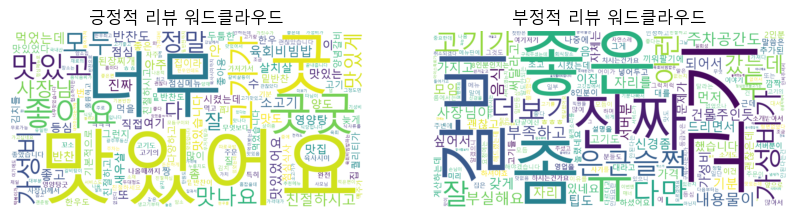

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 긍정적 리뷰 텍스트 결합
positive_reviews = " ".join(data[data['sentiment'] == '긍정적']['Review'].dropna())

# 부정적 리뷰 텍스트 결합
negative_reviews = " ".join(data[data['sentiment'] == '부정적']['Review'].dropna())

# 한글 폰트 경로 설정 (사용할 폰트 경로로 변경하세요)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 맑은 고딕 폰트 경로 예시입니다.

# 워드클라우드 생성
wordcloud_positive = WordCloud(width=1200, height=600, background_color='white', font_path=font_path).generate(positive_reviews)
wordcloud_negative = WordCloud(width=1200, height=600, background_color='white', font_path=font_path).generate(negative_reviews)

# 한글 폰트 설정 (matplotlib용)
plt.rc('font', family='Malgun Gothic')  # 폰트 이름이 올바르게 설정되어야 합니다.

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('긍정적 리뷰 워드클라우드')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('부정적 리뷰 워드클라우드')

plt.show()


In [22]:
data[data['sentiment']=='부정적']

,Date,Review,sentiment
7,4년 전,주차공간도 부족하고 음식 내용물이 부실해요...ㅠ.ㅠ,부정적
17,1년 전,사장님이 건물주인듯,부정적
24,2년 전,가성비...,부정적
25,2024-10,좋은 모임 자리를 갖게 되어서 기분 좋은 자리 가지고 싶어서 서버분 팁도 먼저 드리...,부정적
27,2024-02,"가성비가 좋은 건 인정하고 맛도 그럭저럭 좋다. 다만, 룸에서는 일부 메뉴 (등급낮...",부정적
29,2023-10,NaN,부정적
33,2023-05,"진짜 직원들 매너 무엇,,, 기분나빠서 나옴",부정적
35,2021-12,고기 맛없음,부정적
65,2023-11,"고깃집에서 고기 구워주시는지가 회식장소 정할 때 되게 중요한데, 고기를 구워주시는 ...",부정적
84,2023-07,친절하고 맛있는데 이번엔 고기 맛이 조금 묘했어요(?),부정적


In [21]:
data = data[data['sentiment'] != 'NaN']
data

,Date,Review,sentiment
0,1년 전,"한우 암소집, 모듬구이와 육회 시켰는데 살치 등심 갈비살등이 아주 맛있었다 양도 그...",긍정적
1,4년 전,"추천메뉴: 새우살\n\n- 국내산 암소, 한우인데도 가격대가 좋은편…",긍정적
2,10달 전,양재 소재 육회비빔밥파는 집 중에 제일 괜춘함,긍정적
3,2년 전,새우살 짱 입니다. 광주무등산 재료의 가치,긍정적
4,1달 전,가성비가 끝내줍니다!,긍정적
...,...,...,...
138,2019-08,너므친절하시고 살치살 맛잇어용,긍정적
139,2019-06,등심 맛있어요 단체 회식으로 먹었지만 모두 만족했습니다~,긍정적
140,2019-06,이제 오픈한 집이라 깨끗하고 고기의 질도 매우 좋았습니다! 번창하세요!,긍정적
141,2019-02,육회비빕밥 시키면 국도 한그릇 같이 나와유 존맛탱,긍정적


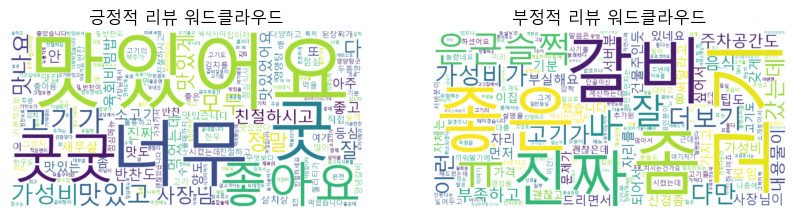

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 긍정적 리뷰 텍스트 결합
positive_reviews = " ".join(data[data['sentiment'] == '긍정적']['Review'].dropna())

# 부정적 리뷰 텍스트 결합
negative_reviews = " ".join(data[data['sentiment'] == '부정적']['Review'].dropna())

# 한글 폰트 경로 설정 (사용할 폰트 경로로 변경하세요)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 맑은 고딕 폰트 경로 예시입니다.

# 1. 부정적 단어 목록 필터링
negative_words = ['나쁘다', '불만족', '싫다', '불편', '부족', '실망', '짜증', '힘들다', '불쾌', '최악']
negative_reviews_filtered = " ".join([word for word in negative_reviews.split() if word in negative_words])

# 2. 감정 분석 사전 활용 (단순 가중치 조절)
negative_reviews_emphasized = " ".join([word * 3 if word in negative_words else word for word in negative_reviews_filtered.split()])

# 3. 부정어 강조
negative_reviews_emphasized = negative_reviews_emphasized.replace("안", "안_안_안").replace("못", "못_못_못").replace("불만", "불만_불만_불만")
negative_reviews_emphasized = negative_reviews_emphasized.replace("없다", "없다_없다_없다").replace("싫다", "싫다_싫다_싫다")

# 빈 텍스트 처리: 필터링 후 텍스트가 비어있으면 원래 부정적 리뷰 텍스트 사용
if not negative_reviews_emphasized.strip():
    negative_reviews_emphasized = negative_reviews

# 워드클라우드 생성
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(negative_reviews_emphasized)

# 한글 폰트 설정 (matplotlib용)
plt.rc('font', family='Malgun Gothic')  # 폰트 이름이 올바르게 설정되어야 합니다.

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('긍정적 리뷰 워드클라우드')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('부정적 리뷰 워드클라우드')

plt.show()
